In [407]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import pickle
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer

In [408]:
ds = pd.read_csv(r'C:\Users\jayak\OneDrive\Desktop\Data Analytics\Mall_Customers.csv')

In [409]:
ds.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [410]:
ds.drop('CustomerID', axis=1, inplace=True)

In [411]:
ds.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [412]:
ds_dummy = pd.get_dummies(ds, columns = ['Gender'], drop_first=True)

In [413]:
ds_dummy.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [414]:
ds_dummy = ds_dummy.astype(int)

In [415]:
ds_dummy.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [416]:
ds_scaled = ds_dummy.drop('Gender_Male', axis=1, inplace=True)

In [417]:
scaler = MinMaxScaler()
ds_scaled = scaler.fit_transform(ds_dummy)
ds_scaled = pd.DataFrame(ds_scaled, columns=ds_dummy.columns)

In [418]:
ds_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


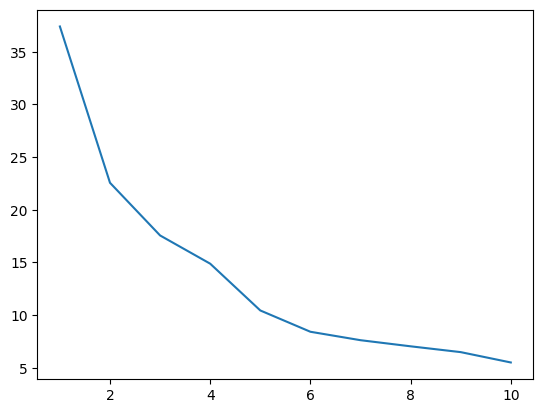

In [419]:
sse =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(ds_scaled)
    sse.append(kmeans.inertia_)
    
plt.plot(range(1,11), sse)
plt.show()

In [420]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster = kmeans.fit_predict(ds_scaled)
ds_scaled['cluster'] = cluster


In [421]:
ds_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0.019231,0.000000,0.387755,4
1,0.057692,0.000000,0.816327,4
2,0.038462,0.008197,0.051020,2
3,0.096154,0.008197,0.775510,4
4,0.250000,0.016393,0.397959,4


In [422]:
pipeline = Pipeline([('scaler', MinMaxScaler()), ('kmeans', KMeans(n_clusters=5, random_state=42))])
X = ds_dummy
pipeline.fit(X)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

In [423]:
with open('new.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

In [424]:
iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(ds_scaled)
ds_scaled['outliers'] = outliers

In [425]:
ds_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster,outliers
0,0.019231,0.000000,0.387755,4,1
1,0.057692,0.000000,0.816327,4,1
2,0.038462,0.008197,0.051020,2,-1
3,0.096154,0.008197,0.775510,4,1
4,0.250000,0.016393,0.397959,4,1


In [426]:
cleaned_data = ds_scaled[ds_scaled['outliers'] == 1]

In [427]:
cleaned_data.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster,outliers
0,0.019231,0.000000,0.387755,4,1
1,0.057692,0.000000,0.816327,4,1
3,0.096154,0.008197,0.775510,4,1
4,0.250000,0.016393,0.397959,4,1
5,0.076923,0.016393,0.765306,4,1


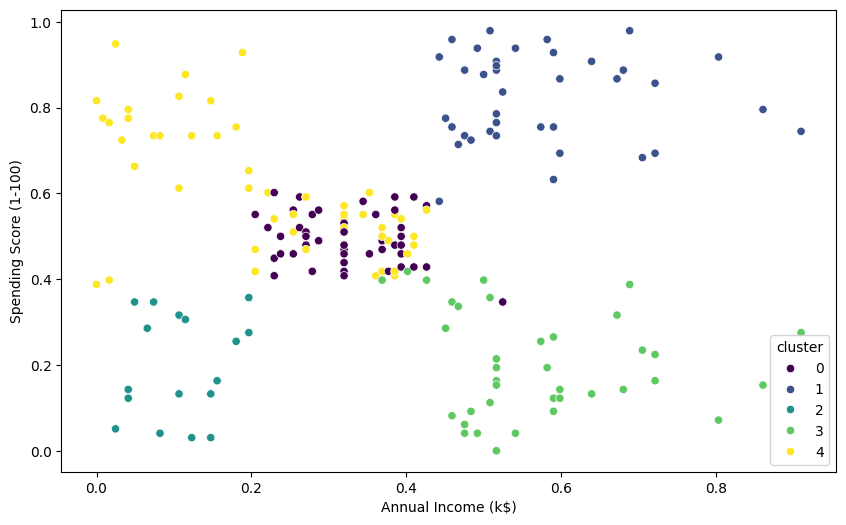

In [428]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=cleaned_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='viridis')
plt.show()